In [9]:
import sys
import os
print(sys.executable)

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import importlib
seaborn_found = importlib.util.find_spec('seaborn')
if seaborn_found is None:
    sys.write.stderr("[error] Seaborn package not found. exit")
    exit(-1)

import seaborn as sns
import pandas as pd

import matplotlib as mpl

#mpl.use("pgf")

import matplotlib.pyplot as plt

plt.rcParams.update({
    "font.family": "serif",  # use serif/main font for text elements
    "text.usetex": False,     # use inline math for ticks
    "pgf.rcfonts": False,    # don't setup fonts from rc parameters
    "pgf.preamble": [
         "\\usepackage{units}",          # load additional packages
         "\\usepackage{metalogo}",
         "\\usepackage{unicode-math}",   # unicode math setup
         r"\setmathfont{xits-math.otf}",
         ]
})


plt.rcParams.update({
    "font.family": "serif",
    "font.serif": ["Times"],                    # use latex default serif font
    "font.size": "22",
})

plt.rcParams.update({
    "pgf.texsystem": "pdflatex",
    "pgf.preamble": [
         r"\usepackage[utf8x]{inputenc}",
         r"\usepackage[T1]{fontenc}",
         r"\usepackage{cmbright}",
         ]
})

# plt.rc('text', usetex=True)

sns.set(style="ticks", color_codes=True, font_scale=1.3)
sns.set_context("paper", rc={"axes.labelsize":14, "axes.titlesize":14, "legend.fontsize":14, "xtick.labelsize":14, "ytick.labelsize":14, "font.size":14})

sns.set_style("darkgrid", {'xtick.bottom': True, 'xtick.top': False, 'ytick.left': True, 'ytick.right': False, 'axes.grid': True, "axes.facecolor": ".9", 'grid.linestyle': '-', 'lines.linewidth':2.5})
# sns.set_palette("dark")

DIR_REAL_DATA="/Users/lpottier/research/usc-isi/projects/active/workflow-io-bb/data/traces/swarp/"
DIR_SIMU="/Users/lpottier/research/usc-isi/projects/active/workflow-io-bb/simulation/output"

/usr/local/opt/python/bin/python3.7


In [10]:
# csv_file = DIR+"/simu-bb-runs2020-1c.csv"
# csv_file = DIR+"/simu-bb_runs2020-Xc.csv"
csv_file = DIR_SIMU+"/simu-bb_runs2020-32c.csv"

CORE="32"
PLOT_DIR=os.getcwd()
# PLOT_DIR="/Users/lpottier/research/usc-isi/projects/paper-workflow-bb/figures/plots/simu-swarp"

OUTPUT = PLOT_DIR+"/"+"simu-bb_runs2020-32c/"

In [11]:
try:
    # Create target Directory
    os.mkdir(OUTPUT)
    print("Directory " , OUTPUT ,  " Created ") 
except FileExistsError:
    print("Directory " , OUTPUT ,  " already exists")

Directory  /Users/lpottier/research/usc-isi/projects/active/workflow-io-bb/data/traces/notebooks/simu-bb_runs2020-32c/  already exists


In [24]:
df = pd.read_csv(csv_file, sep=' ')
CORE="32"
# print(df.head())
# df.rename(columns={"FILES": "BB_NB_FILES", "CORES": "NB_CORES"}, errors="raise")

df.agg = df.groupby(['ID', 'BB_NB_FILES','FITS', 'BB_TYPE', 'AVG', 'NB_CORES'], as_index=False).agg({'MEASURED_MKSP_S': 'max', 'ERR_MKSP': 'max', 'SIMULATION_S': 'max', 'MEASURED_WALLTIME_S': 'max', 'ERR_WALLTIME': 'max'})

In [25]:
df.agg.head()

,ID,BB_NB_FILES,FITS,BB_TYPE,AVG,NB_CORES,MEASURED_MKSP_S,ERR_MKSP,SIMULATION_S,MEASURED_WALLTIME_S,ERR_WALLTIME
0,27825307,0,Y,PRIVATE,1,32,110.435,0.042732,115.155,123.386,0.066714
1,27825307,0,Y,PRIVATE,2,32,106.646,0.056309,112.651,118.900,0.052561
2,27825307,0,Y,PRIVATE,3,32,108.771,0.047811,113.971,118.753,0.040268
3,27825307,0,Y,PRIVATE,4,32,109.215,0.047196,114.370,130.644,0.124569
4,27825307,0,Y,PRIVATE,5,32,109.729,0.044955,114.661,119.492,0.040426


In [27]:
df.real = pd.read_csv(DIR_REAL_DATA+"/shared-cori/bb-runs2020-32c.csv", sep=' ')

# df.real = df.real.loc[df['BB_NB_FILES'].isin([0,8,16,24,32])]
# df.real = df.real[df.real.NB_CORES==int(CORE)]

big = pd.merge(df, df.real, on=['ID', 'BB_NB_FILES','FITS', 'BB_TYPE', 'AVG', 'NB_CORES'])

bigagg = big.groupby(['ID', 'BB_NB_FILES','FITS', 'BB_TYPE', 'AVG', 'NB_CORES'], as_index=False).agg({'MEASURED_MKSP_S': 'max', 'MAKESPAN_S': 'max', 'SIMULATION_S': 'max', 'MEASURED_WALLTIME_S': 'max', 'ERR_WALLTIME': 'max'})


In [28]:
bigagg['ERR'] = (abs(bigagg['MAKESPAN_S'] - bigagg['SIMULATION_S']) / bigagg['SIMULATION_S']) *100
bigagg.head()
bigagg['BB_NB_FILES'] = (bigagg['BB_NB_FILES']*100)/32.0

In [29]:
print(df.head())
print("BB_NB_FILES :", df.BB_NB_FILES.unique())
print("BB_TYPE     :", df.BB_TYPE.unique())
print("BB_TYPE     :", df.FITS.unique())
print("NB_PIPELINE :", df.NB_PIPELINE.unique())

         ID  AVG FITS  BB_TYPE     WORKFLOW  PLATFORM  NB_PIPELINE  PIPELINE  \
0  27829588    1    N  PRIVATE  swarp-1.dax  cori.xml            1         1   
1  27829588    2    N  PRIVATE  swarp-1.dax  cori.xml            1         1   
2  27829588    3    N  PRIVATE  swarp-1.dax  cori.xml            1         1   
3  27829588    4    N  PRIVATE  swarp-1.dax  cori.xml            1         1   
4  27829588    5    N  PRIVATE  swarp-1.dax  cori.xml            1         1   

   NB_CORES  BB_NB_FILES  DATA_MB   LATENCY  BANDWITH  SIMULATION_S  \
0        32            0      0.0  0.117647   2.32143       120.407   
1        32            0      0.0  0.117647   2.32143       124.138   
2        32            0      0.0  0.117647   2.32143       121.365   
3        32            0      0.0  0.117647   2.32143       120.297   
4        32            0      0.0  0.117647   2.32143       122.161   

   MEASURED_MKSP_S  ERR_MKSP  MEASURED_WALLTIME_S  ERR_WALLTIME  
0          117.184  0.0275

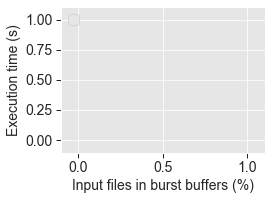

In [20]:
xlabel='Input files in burst buffers (%)'
ylabel='Execution time (s)'

# name = col.split("_")[0].lower()
is_FITS = bigagg['FITS']=="Y"
is_PRIVATE = bigagg['BB_TYPE']=="PRIVATE"

f = plt.figure(figsize=(4, 3))
f.patch.set_alpha(0)

g = sns.lineplot(x="BB_NB_FILES", y="MAKESPAN_S", data=bigagg[is_FITS & is_PRIVATE],  color="b", markers=True)
g = sns.lineplot(x="BB_NB_FILES", y="SIMULATION_S", data=bigagg[is_FITS & is_PRIVATE],  color="r", markers=True)

g.legend(loc='upper left', title='', labels=["Measured makespan", "Simulated makespan"])

g.set(xlabel=xlabel, ylabel=ylabel)

plt.tight_layout()
plt.savefig(OUTPUT+'swarp-simu-private-mksp-files.pdf', facecolor=f.get_facecolor(), edgecolor='none')
plt.savefig(OUTPUT+'swarp-simu-private-mksp-files.pgf', facecolor=f.get_facecolor(), edgecolor='none')
plt.show()

In [30]:
print("min error",
    min(bigagg[is_FITS & is_PRIVATE]['ERR']),
    ", avg error",
    numpy.mean(bigagg[is_FITS & is_PRIVATE]['ERR']),
    ", sd error",
    numpy.std(bigagg[is_FITS & is_PRIVATE]['ERR']),
    ", max error",
    max(bigagg[is_FITS & is_PRIVATE]['ERR']),
)

ValueError: min() arg is an empty sequence

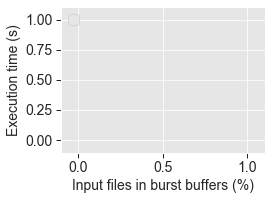

In [22]:
xlabel='Input files in burst buffers (%)'
ylabel='Execution time (s)'

# name = col.split("_")[0].lower()

f = plt.figure(figsize=(4, 3))
f.patch.set_alpha(0)

g = sns.lineplot(x="BB_NB_FILES", y="MAKESPAN_S", data=bigagg[~is_PRIVATE & is_FITS],  color="b", markers=True)
g = sns.lineplot(x="BB_NB_FILES", y="SIMULATION_S", data=bigagg[~is_PRIVATE & is_FITS],  color="r", markers=True)

g.legend(loc='upper left', title='', labels=["Measured makespan", "Simulated makespan"])
g.set(xlabel=xlabel, ylabel=ylabel)

plt.tight_layout()
plt.savefig(OUTPUT+'swarp-simu-striped-mksp-files.pdf', facecolor=f.get_facecolor(), edgecolor='none')
plt.savefig(OUTPUT+'swarp-simu-striped-mksp-files.pgf', facecolor=f.get_facecolor(), edgecolor='none')
plt.show()


In [23]:
print("min error",
    min(bigagg[~is_PRIVATE & is_FITS]['ERR']),
    ", avg error",
    numpy.mean(bigagg[~is_PRIVATE & is_FITS]['ERR']),
    ", sd error",
    numpy.std(bigagg[~is_PRIVATE & is_FITS]['ERR']),
    ", max error",
    max(bigagg[~is_PRIVATE & is_FITS]['ERR']),
)

ValueError: min() arg is an empty sequence